## Supervised Learning in the Perceptron Neuron

### Team Members
- **Juliana Ballin Lima** – Registration: 2315310011  
- **Marcelo Heitor de Almeida Lira** – Registration: 2315310043  
- **Lucas Maciel Gomes** – Registration: 2315310014  
- **Ryan da Silva Marinho** – Registration: 2315310047  
- **Vitória Gabrielle Kinshasa Silva de Almeida** – Registration: 2415280044

In [1]:
"""
Libraries required for the project.
Mandatory: numpy, random, math, matplotlib.
sklearn is allowed only for performance metrics.
"""

import math
import random

import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)


In [3]:
"""
Display team members in a structured way.
This ensures clarity and meets evaluation criteria.
"""

team_members: dict[str, str] = {
    "Juliana Ballin Lima": "2315310011",
    "Marcelo Heitor de Almeida Lira": "2315310043",
    "Lucas Maciel Gomes": "2315310014",
    "Ryan da Silva Marinho": "2315310047",
    "Vitória Gabrielle Kinshasa Silva de Almeida": "2415280044"
}

for name, reg in team_members.items():
    print(f"{name} - {reg}")

Juliana Ballin Lima - 2315310011
Marcelo Heitor de Almeida Lira - 2315310043
Lucas Maciel Gomes - 2315310014
Ryan da Silva Marinho - 2315310047
Vitória Gabrielle Kinshasa Silva de Almeida - 2415280044


In [5]:
"""
Calculate team identifier based on the sum of the last digits
of registration numbers, applying modulo 4.
"""

# Last digits of registrations
ids: list[int] = [1, 3, 4, 7, 4]
team_sum: int = sum(ids)
team_identifier: int = team_sum % 4

print("Team identifier:", team_identifier)

Team identifier: 3


In [7]:
"""
Utility functions for the Perceptron algorithm.
Includes activation and training procedure.
"""

def activation_function(u: float) -> int:
    """
    Step activation function with threshold θ = 0.

    Args:
        u (float): Linear combination input

    Returns:
        int: 1 if u >= 0 else 0.
    """
    return 1 if u >= 0 else 0


def perceptron_train(X, y, eta=0.1, max_epochs=1000, initial_weights=None) -> tuple[np.ndarray, int, int, np.ndarray | None]:
    """
    Perceptron training until convergence or max_epochs.

    Args:
        X (ndarray): input data with bias
        y (ndarray): labels (0 or 1)
        eta (float): learning rate
        max_epochs (int): maximum iterations
        initial_weights (ndarray): optional starting weights

    Returns:
        tuple: (final_weights, epochs, adjustments, initial_weights)
    """
    if initial_weights is None:
        rng = np.random.default_rng()
        w = rng.uniform(-0.5, 0.5, X.shape[1])
    else:
        w = initial_weights.copy()

    adjustments = 0
    epoch = 0

    while epoch < max_epochs:
        error_count = 0
        for i in range(len(X)):
            u = np.dot(X[i], w)
            y_hat = 1 if u >= 0 else 0
            e = y[i] - y_hat
            if e != 0:
                w += eta * e * X[i]
                adjustments += 1
                error_count += 1
        if error_count == 0:
            break
        epoch += 1

    return w, epoch, adjustments, initial_weights


In [9]:
"""
Utility to load datasets provided by the professor.
Files were saved in raw binary format using numpy.tofile().
Each row has (x1, x2, yd).
"""

def load_dataset(path: str) -> np.ndarray:
    """Load dataset from binary file and reshape to (m, 3)."""
    return np.fromfile(path, dtype=np.float64).reshape(-1, 3)

## Part I: Linearly Separable Problem

In [12]:
"""
Load the dataset dataAll.txt for Part I.
Split into features (X) and labels (y).
Add bias term (column of ones).
"""

# Load dataset
data = load_dataset("data/dataAll.txt")

# Features and labels
X = data[:, :2]
y = data[:, 2].astype(int)

# Add bias
X_bias = np.c_[np.ones(X.shape[0]), X]

print("--- Dataset loaded ---")
print("Shape:", data.shape)
print("Class distribution:", np.bincount(y))
print("First 5 rows:\n", data[:5])

--- Dataset loaded ---
Shape: (1000, 3)
Class distribution: [476 524]
First 5 rows:
 [[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


In [14]:
"""
Split dataset into input features (X) and labels (y).
Add bias term (column of ones) to X.
"""

# Features and labels
X = data[:, :2]
y = data[:, 2].astype(int)

# Add bias
X_bias = np.c_[np.ones(X.shape[0]), X]

print("X_bias shape:", X_bias.shape)
print("y distribution:", np.bincount(y))

X_bias shape: (1000, 3)
y distribution: [476 524]


In [16]:
"""
Train the Perceptron on the linearly separable dataset.
Learning rate η = 0.1 (as specified in the assignment).
"""

# Generate initial weights using np.random.Generator
rng = np.random.default_rng()
initial_weights = rng.uniform(-0.5, 0.5, X_bias.shape[1])

# Train using the same initial weights
weights, epochs, adjustments, used_init = perceptron_train(
    X_bias, y, eta=0.1, initial_weights=initial_weights
)

# Results
print("--- Training finished ---")
print(f"Initial weights: {used_init}")
print(f"Final weights: {weights}")
print(f"Epochs until convergence: {epochs}")
print(f"Total adjustments: {adjustments}")


--- Training finished ---
Initial weights: [ 0.42480048 -0.06023551  0.05943014]
Final weights: [   0.92480048  323.34879449 -323.45140986]
Epochs until convergence: 3
Total adjustments: 55


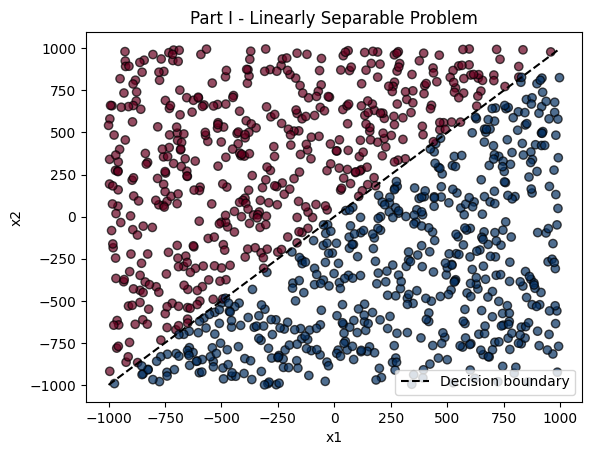

In [18]:
"""
Plot dataset points and decision boundary learned by the Perceptron.
Class 0 = red, Class 1 = blue.
"""

# Scatter plot with class colors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors="k", alpha=0.7)

# Compute decision boundary line
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]

plt.plot(x_vals, y_vals, "k--", label="Decision boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Part I - Linearly Separable Problem")
plt.legend()
plt.show()

## Part II: Experimentation

In [20]:
"""
Experiment with multiple configurations of learning rate and
weight initialization intervals. Perform 10 runs for each setup.
"""

# Load dataset
data_p2 = load_dataset("data/data3.txt")

# Features and labels
X_p2 = data_p2[:, :2]
y_p2 = data_p2[:, 2].astype(int)

# Add bias
X_p2_bias = np.c_[np.ones(X_p2.shape[0]), X_p2]

print("--- Dataset loaded ---")
print("X_bias shape:", X_p2_bias.shape)
print("y distribution:", np.bincount(y_p2))
print("\nFirst 5 rows:\n", data[:5])

--- Dataset loaded ---
X_bias shape: (600, 3)
y distribution: [300 300]

First 5 rows:
 [[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


In [22]:
def perceptron_train_exp(X_p2, y_p2, eta=0.1, weight_range=(-0.5, 0.5)) -> tuple[np.ndarray, int, int, np.ndarray]:
    """
    Perceptron training until convergence.

    Args:
        X_p2 (ndarray): input data with bias
        y_p2 (ndarray): labels (0 or 1)
        eta (float): learning rate
        max_epochs (int): maximum iterations
        weight_range (list[float]): starting weights

    Returns:
        tuple: (final_weights, epochs, adjustments, initial_weights)
    """
    rng = np.random.default_rng()
    w: np.ndarray = rng.uniform(weight_range[0], weight_range[1], X_p2.shape[1])
    initial_weights_print: np.ndarray = w.copy()

    adjustments = 0
    epoch = 0

    # Using while until the error_cont == 0)
    # This always will converge because the problem is linearly separable
    while True:
        error_count = 0
        for i in range(len(X_p2)):
            u = np.dot(X_p2[i], w)
            y_hat = 1 if u >= 0 else 0
            e = y_p2[i] - y_hat
            if e != 0:
                w += eta * e * X_p2[i]
                adjustments += 1
                error_count += 1

        epoch += 1
        if error_count == 0:
            break

    return w, epoch, adjustments, initial_weights_print

In [24]:
# Hyperparameters to be tested
learning_rates: list[float] = [0.4, 0.1, 0.01]
weight_intervals: list[tuple[float, float]] = [(-100.0, 100.0), (-0.5, 0.5)]
num_repetitions = 10

# List for results
final_results = []

In [26]:
for eta in learning_rates:
    # Loop for each weigh_intervals
    for interval in weight_intervals:

        # Temporary lists to store the 10 repeats results for each config
        adjustments_temp = []
        epochs_temp = []

        for _ in range(num_repetitions):
            _, epochs, adjustments, _ = perceptron_train_exp(
                X_p2_bias, y_p2, eta=eta, weight_range=interval
            )

            adjustments_temp.append(adjustments)
            epochs_temp.append(epochs)


        mean_adjustments = np.mean(adjustments_temp)
        std_adjustments = np.std(adjustments_temp)

        min_epochs = min(epochs_temp)

        final_results.append({
            "eta": eta,
            "interval": interval,
            "mean_adj": mean_adjustments,
            "std_adj": std_adjustments,
            "min_epochs": min_epochs
        })


In [28]:
table = PrettyTable()
table.field_names = [
    "Taxa de Aprendizado",
    "Intervalo de Pesos",
    "Quantidade de Ajustes (Média ± Desvio Padrão)",
    "Menor Nº de Épocas"
]

In [30]:
for result in final_results:
    adj_str: str = f"{result['mean_adj']:.2f} ± {result['std_adj']:.2f}"

    table.add_row([
        f"η = {result['eta']}",
        f"{result['interval']}",
        adj_str,
        result["min_epochs"]
    ])

print(table)

+---------------------+--------------------+-----------------------------------------------+--------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Quantidade de Ajustes (Média ± Desvio Padrão) | Menor Nº de Épocas |
+---------------------+--------------------+-----------------------------------------------+--------------------+
|       η = 0.4       |  (-100.0, 100.0)   |                271.10 ± 122.53                |         5          |
|       η = 0.4       |    (-0.5, 0.5)     |                  8.20 ± 5.06                  |         2          |
|       η = 0.1       |  (-100.0, 100.0)   |                1453.00 ± 504.63               |         18         |
|       η = 0.1       |    (-0.5, 0.5)     |                  11.70 ± 5.71                 |         2          |
|       η = 0.01      |  (-100.0, 100.0)   |               11985.00 ± 5656.36              |         81         |
|       η = 0.01      |    (-0.5, 0.5)     |                 76.80 ± 48.38              

### Discussão

Intervalo de pesos é crucial: Um intervalo grande: (-100, 100) tornou o treinamento instável, apresentando um desvio padrão alto e exigindo um número muito maior de ajustes para a convergência.

Taxa de aprendizado afeta a eficiência: Uma taxa de aprendizado alta (η = 0.4) precisou de menos ajustes para convergir. Enquanto que taxa muito baixa (η = 0.01) foi a mais ineficiente, precisando de muitas correções.

Melhor configuração: A configuração de η = 0.4 e intervalo (-0.5, 0.5) foi a melhor, pois apresentou a combinação ideal de eficiência (menor média de ajustes) e estabilidade (menor desvio padrão), tornando o treinamento mais rápido e previsível.

## Part III: Holdout Validation

#### Loading and Visualizing the Non-Linearly Separable Dataset

=== Part III: Holdout Validation for Non-Linearly Separable Problem ===
Loading dataset: dataHoldout.txt
Dataset shape: (800, 3)
Class distribution: [600 200]
First 5 rows:
 [[-0.29322959 -0.09065359  1.        ]
 [ 0.07988839  0.21101297  1.        ]
 [-0.07825563 -0.08083512  1.        ]
 [-0.46833414 -0.10620722  1.        ]
 [ 0.46304142  0.09405471  1.        ]]


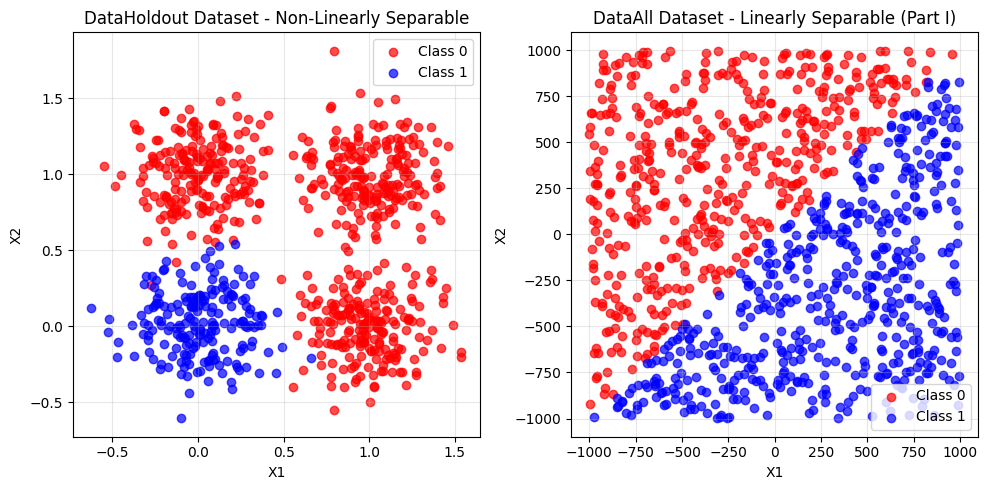

Visual analysis confirms the non-linear separability of dataHoldout.txt


In [32]:
print("=== Part III: Holdout Validation for Non-Linearly Separable Problem ===")
print("Loading dataset: dataHoldout.txt")

# Load the non-linearly separable dataset
data_holdout = load_dataset("data/dataHoldout.txt")
X_holdout = data_holdout[:, :2]
y_holdout = data_holdout[:, 2].astype(int)

print("Dataset shape:", data_holdout.shape)
print("Class distribution:", np.bincount(y_holdout))
print("First 5 rows:\n", data_holdout[:5])

# Visualize to show non-linear separability
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_holdout[y_holdout == 0, 0], X_holdout[y_holdout == 0, 1],
           c='red', alpha=0.7, label='Class 0')
plt.scatter(X_holdout[y_holdout == 1, 0], X_holdout[y_holdout == 1, 1],
           c='blue', alpha=0.7, label='Class 1')
plt.title('DataHoldout Dataset - Non-Linearly Separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)

# Compare with the linearly separable dataset from Part I
plt.subplot(1, 2, 2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', alpha=0.7, label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', alpha=0.7, label='Class 1')
plt.title('DataAll Dataset - Linearly Separable (Part I)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Visual analysis confirms the non-linear separability of dataHoldout.txt")

#### Data Splitting (70% training / 30% testing)

In [36]:
print("=== Data Splitting ===")

# Set random seed based on team identifier
team_identifier = 3  # From cell 4 in the notebook
random_seed = team_identifier
print(f"Using random seed: {random_seed}")

# Add bias term
X_holdout_bias = np.c_[np.ones(X_holdout.shape[0]), X_holdout]

# Split data into training and testing sets
np.random.seed(random_seed)
indices = np.random.permutation(len(X_holdout_bias))
split_point = int(0.7 * len(X_holdout_bias))

train_indices = indices[:split_point]
test_indices = indices[split_point:]

X_train = X_holdout_bias[train_indices]
y_train = y_holdout[train_indices]
X_test = X_holdout_bias[test_indices]
y_test = y_holdout[test_indices]

print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X_holdout_bias)*100:.1f}%)")
print(f"Test set size: {len(X_test)} samples ({len(X_test)/len(X_holdout_bias)*100:.1f}%)")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

=== Data Splitting ===
Using random seed: 3
Training set size: 560 samples (70.0%)
Test set size: 240 samples (30.0%)
Training class distribution: [411 149]
Test class distribution: [189  51]


#### Modified Perceptron Training Function for 100 Epochs

In [38]:
# Cell 3: Modified Perceptron Training Function for 100 Epochs
print("=== Perceptron Training Configuration ===")

def perceptron_train_holdout(X, y, eta=0.1, max_epochs=100, initial_weights=None, random_seed=3):
    """
    Perceptron training with random presentation order each epoch.

    Args:
        X: input data with bias
        y: labels (0 or 1)
        eta: learning rate
        max_epochs: maximum iterations
        initial_weights: optional starting weights
        random_seed: seed for random ordering

    Returns:
        tuple: (final_weights, training_history, all_weights)
    """
    if initial_weights is None:
        rng = np.random.default_rng(random_seed)
        w = rng.uniform(-0.5, 0.5, X.shape[1])
    else:
        w = initial_weights.copy()

    training_history = {
        'epoch_errors': [],
        'weights_history': [],
        'adjustments_per_epoch': []
    }

    epoch = 0
    all_weights = [w.copy()]

    while epoch < max_epochs:
        # Randomize presentation order each epoch
        np.random.seed(random_seed + epoch)  # Different seed each epoch
        order = np.random.permutation(len(X))

        error_count = 0
        adjustments = 0

        for i in order:
            u = np.dot(X[i], w)
            y_hat = activation_function(u)
            e = y[i] - y_hat

            if e != 0:
                w += eta * e * X[i]
                adjustments += 1
                error_count += 1

        training_history['epoch_errors'].append(error_count)
        training_history['adjustments_per_epoch'].append(adjustments)
        training_history['weights_history'].append(w.copy())
        all_weights.append(w.copy())

        epoch += 1

    return w, training_history, all_weights

print("Training configuration:")
print(f"- Learning rate (η): 0.1")
print(f"- Max epochs: 100")
print(f"- Weight initialization: U(-0.5, +0.5)")
print(f"- Activation: step function (θ=0)")

=== Perceptron Training Configuration ===
Training configuration:
- Learning rate (η): 0.1
- Max epochs: 100
- Weight initialization: U(-0.5, +0.5)
- Activation: step function (θ=0)


#### Training the Perceptron

=== Training Perceptron for 100 Epochs ===
Training completed!
Final weights: [ 0.18564917 -0.61691808 -0.49856201]


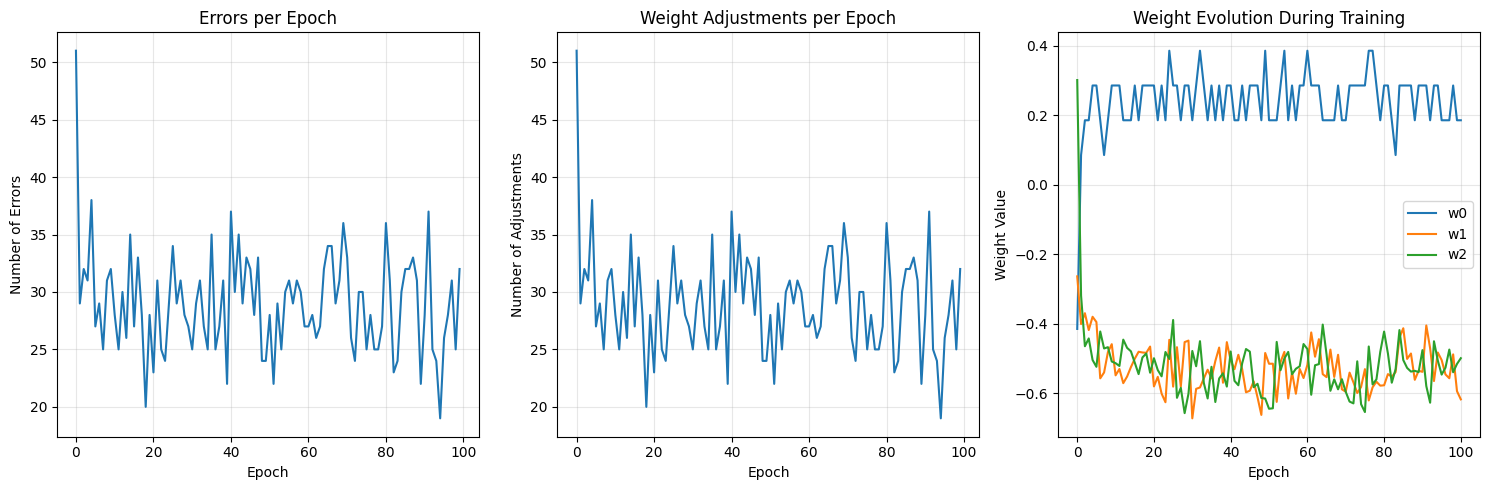

Note: The persistent errors indicate non-linear separability


In [40]:
print("=== Training Perceptron for 100 Epochs ===")

# Train the perceptron
final_weights, training_history, all_weights = perceptron_train_holdout(
    X_train, y_train, eta=0.1, max_epochs=100, random_seed=random_seed
)

print("Training completed!")
print(f"Final weights: {final_weights}")

# Plot training progress
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(training_history['epoch_errors'])
plt.title('Errors per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(training_history['adjustments_per_epoch'])
plt.title('Weight Adjustments per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Number of Adjustments')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
# Plot weight evolution
weights_array = np.array(all_weights)
for i in range(weights_array.shape[1]):
    plt.plot(weights_array[:, i], label=f'w{i}')
plt.title('Weight Evolution During Training')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Note: The persistent errors indicate non-linear separability")

#### Predictions and Evaluation Metrics

=== Model Evaluation on Test Set ===
1. CONFUSION MATRIX:
[[187   2]
 [ 10  41]]


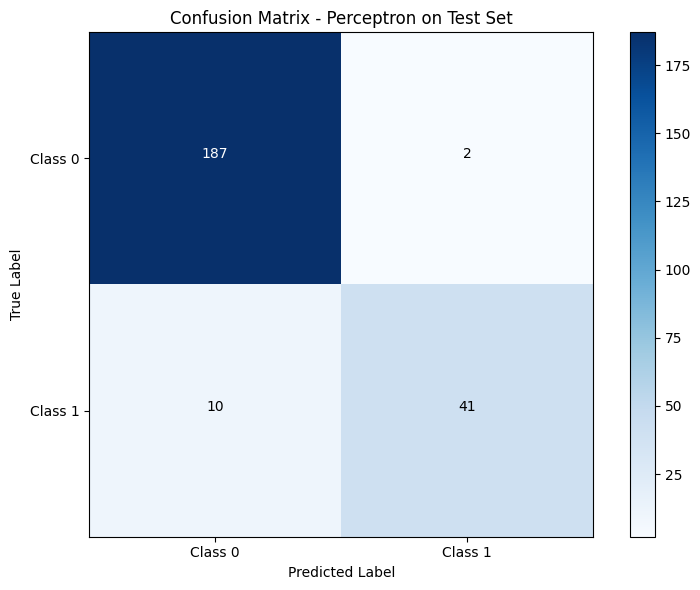


2. ACCURACY:
Test Accuracy: 0.9500 (95.00%)
Training Accuracy: 0.9446 (94.46%)


In [42]:
print("=== Model Evaluation on Test Set ===")

def predict_perceptron(X, weights):
    """Make predictions using trained perceptron weights"""
    predictions = []
    for sample in X:
        u = np.dot(sample, weights)
        predictions.append(activation_function(u))
    return np.array(predictions)

# Make predictions on test set
y_test_pred = predict_perceptron(X_test, final_weights)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, zero_division=0)
recall = recall_score(y_test, y_test_pred, zero_division=0)
f1 = f1_score(y_test, y_test_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("1. CONFUSION MATRIX:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Perceptron on Test Set')
plt.colorbar()

classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\n2. ACCURACY:")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Also calculate training accuracy for comparison
y_train_pred = predict_perceptron(X_train, final_weights)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")



Precisão: 0.9534883720930233
Recall: 0.803921568627451
F-Score: 0.8723404255319149


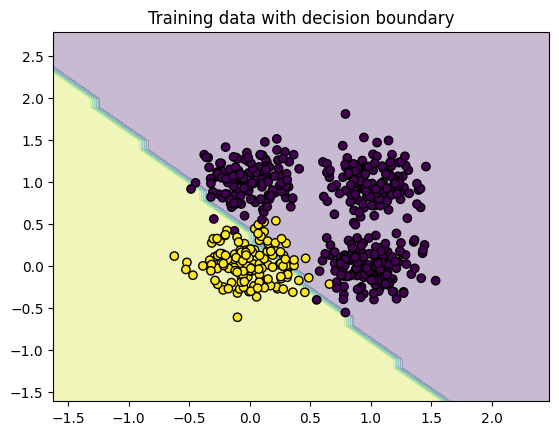

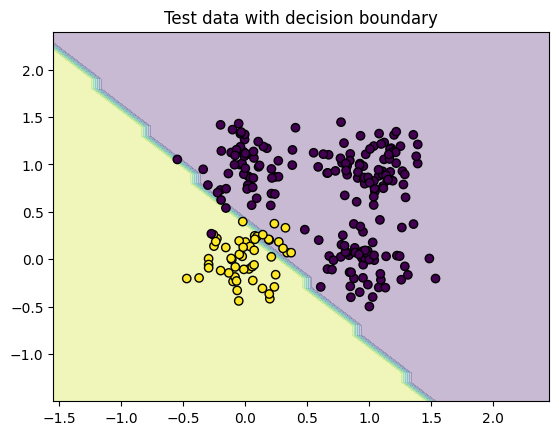

In [46]:
def predict_linear(X, w):
    return (X @ w >= 0).astype(int)

y_pred = predict_linear(X_test, final_weights)

print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F-Score:", f1_score(y_test, y_pred))

def plot_decision_boundary_w(X, y, w, title):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[np.ones(xx.size), xx.ravel(), yy.ravel()]
    Z = predict_linear(grid, w).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolor='k')
    plt.title(title)
    plt.show()

plot_decision_boundary_w(X_train, y_train, final_weights, "Training data with decision boundary")
plot_decision_boundary_w(X_test, y_test, final_weights, "Test data with decision boundary")


### Conclusão

#### Análise das métricas
* Acurácia: 95%. Mostra que o modelo conseguiu minimizar o "impacto" de um dataset não linearmente separável.
* Precisão: 95.34%. Indica que o modelo tem um bom desempenho ao prever a classe 1, raramente apontando um dado de classe 0 erroneamente como classe 1
* Recall: 80.39%. O "ponto fraco" do modelo. Talvez pela quantidade maior de dados da classe 0, indica que o perceptron falha em classificar verdadeiros dados da classe 1 como tal, confundindo-os como dados da outra classe.
* F1-score: 87.23%. Mostra o equilíbrio da Precisão e do Recall. É "arrastado" para baixo em decorrência do modelo não conseguir identificar dados da classe 1 como tal.

#### Discussão
Embora os resultados mostrem métricas satisfatórias, o modelo apresenta dificuldade em identificar dados da classe 1.